## K-Nearest Neighbors(KNN)


This project aims to detect the cancer by using the values of two genes calles gene one and gene two. Target feature is called ccancer present and consists of 2 classes, 0 and 1 respectively. While 1 points out cancer, 0 means not cancer. A KNN calssification algorithm will be performed to build a model and evaluate its performance.

The steps in this project as follows:

- EDA process
- Train|Test split
- Modelling (scaling + pipeline)
- Model Performance on classification tasks
    - confusion matrix + classification report
    - evaluation metrics (accuracy(balanced data), precision-recall-f1 score)
- Elbow method for K Value
- Overfitting-Underfitting control for k values
- Scorres for various k values
- Cross validation for optimal k value
- Evaluating ROC Curve (receiver operating characteristic curve) and AUC (are under curve)
- Final model and model deployment
- Sample prediction for new observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [5]:
df["Cancer Present"].value_counts()
# balanced bir dataset. ama 500e 2500 olsa da yine scorelara bakip imbalanced veya degil karari veririz.
# 0 ve 1 classının scorelari dengeliyse dataset balance, dengesizse imbalanced diyoruz.

1    1500
0    1500
Name: Cancer Present, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

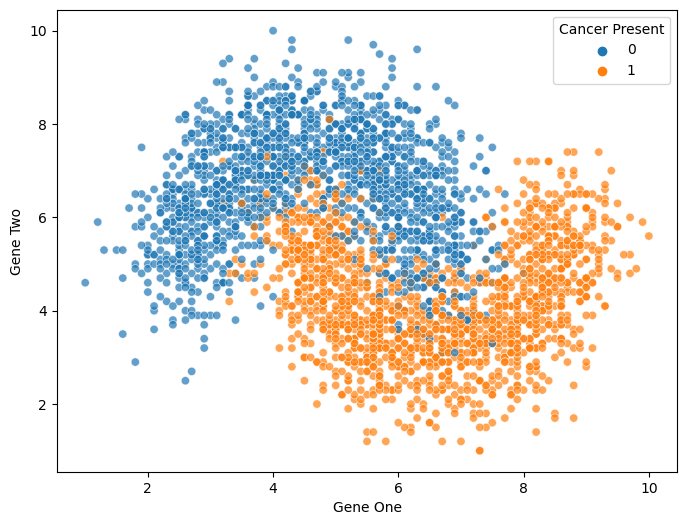

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

# KNN algoritmaları biribirinden ayrışık olan datalarda çok daha iyi sonuçlar verir. Biribirine grift olan datalarda ise 
# kötü sonuçlar verir. Mesela bu data özelinde en fazla hatayı boundry-sınır gözlemlerde yani birbirine grift olan yerlerde
# yapacaktır.

(4.0, 8.0)

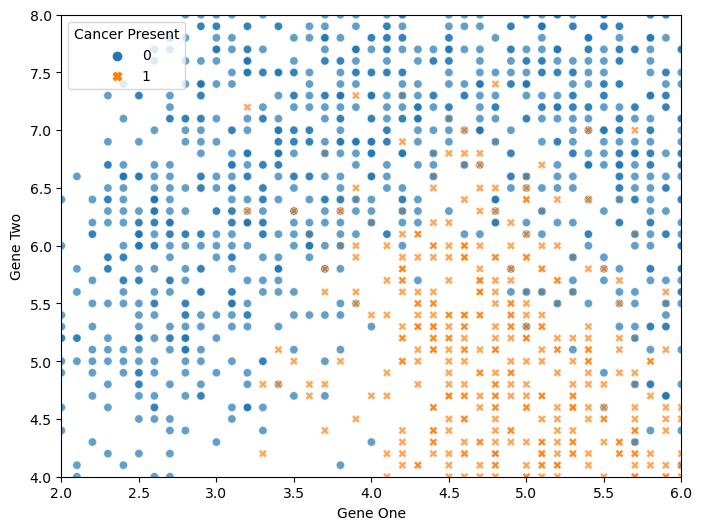

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)
# girift oldugu noktalara zoomlayalim

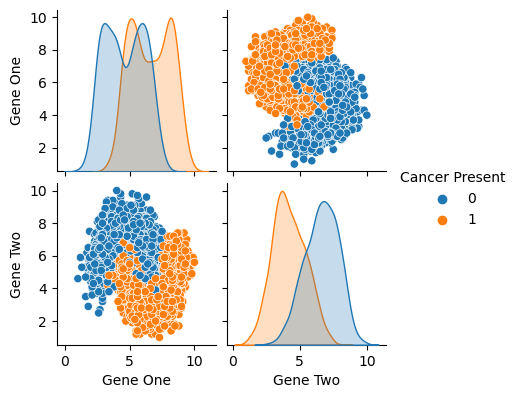

In [8]:
sns.pairplot(data=df, hue="Cancer Present", height=2, aspect =1)

# Gene oneın kdeplotuna gore bu feature için 2 class nerdeyse %50 oranında birbirine grift gibi görünüyor.
# Gene twonun kdeplotuna gore bu feature için 2 class nerdeyse %25 oranında birbirine grift gibi görünüyor.
# Gene two featurenının daha ayrıştırıcı bir feature (önemli bir feature) olduğunu söyleyebiliriz.

# Ancak 2 boyutlu görselleştirmeler bizi yanıltabilir. Burdan aldığımız insightları Boxplot üzerinden de teyit etmemiz
# gerekir.

<Axes: xlabel='Cancer Present', ylabel='Gene One'>

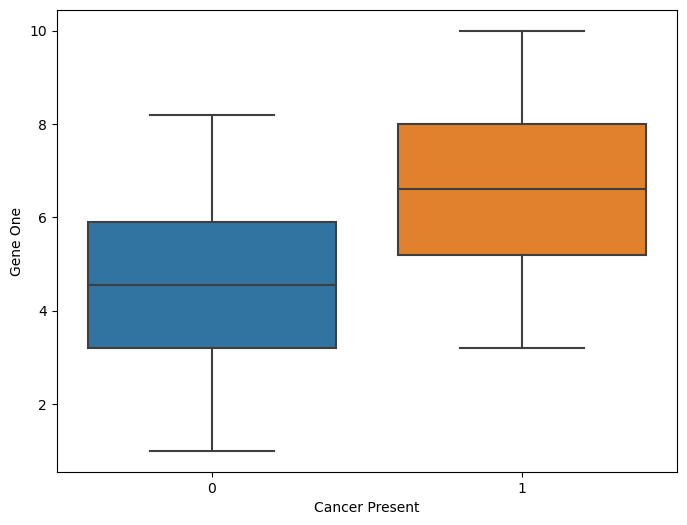

In [9]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df)

# Gene One büyüdükçe kanser olma riski artar.
# pairplottan aldığımız insghtları burdan da alabiliyoruz. Gene one özelinde 2 class Gene two'ya göre biribiryle daha fazla
# kesişiyor.
# kanser olmayanların gene 1 ortalaması 4.5; olanların ort.si 7 gibi

<Axes: xlabel='Cancer Present', ylabel='Gene Two'>

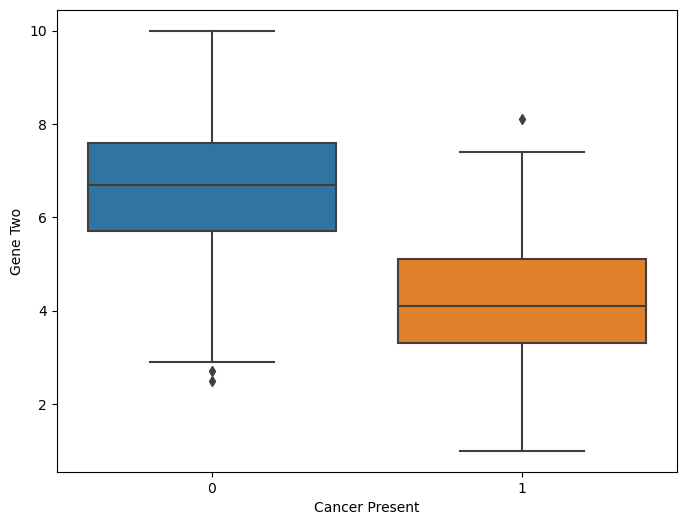

In [10]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df)

# Gene two küçüldükçe kanser olma riski artar.
# pairplottan aldığımız insghtları burdan da alabiliyoruz. Gene two özelinde 2 class Gene one'a göre biribiryle daha az
# kesişiyor.
# olmayanların gene 2 ort.sı 7, olanların 3.7 gibi. yani kan icindeki gen 2 miktari azaldikca kanser riski artiyor.

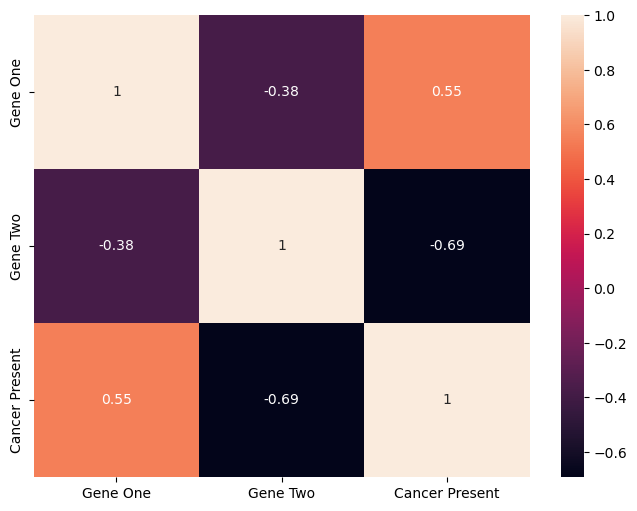

In [11]:
sns.heatmap(df.corr(), annot=True);

# Boxplotlardan çıkardığımız insghtları burda da görebiliyoruz.

## Train|Test Split and Scaling Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [15]:
from sklearn.neighbors import KNeighborsClassifier  # regression icin KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
# n_neighbours yani k default 5tir zaten

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# KNN distance-mesafe tabanlı bir model olduğundan datayı mutlaka scale etmeliyiz.
# Bu datamızda her 2 class'ta 1-10 arasında değer almış. Datanın kendisi scale ihtiyaç duymuyor aslında. Bu gibi durumlarda
# data hem scallenmeden hem de scallenerek sonuçlar kontrol edilir. Hangisi daha iyi sonuç veriyorsa onunla devam edilir.

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [17]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [18]:
y_pred_proba = pipe_model.predict_proba(X_test)
# 0 veya 1 olma olasıklıkları icin proba
 
# Eğer weights=uniform ise tüm komşulara eşit ağırlık verilir. weights=distance ise yakın olan komşulara daha fazla ağırlık
# verilirken uzakta olan komşulara daha az ağırlık verilir.

# model arka planda belirlediğimiz komşu sayısı ve weights hyper-parametrelerine göre hangi sınıfa ait olma olasılığı 
# tespit eder.

In [19]:
pd.DataFrame(y_pred_proba)

# modelimizde weights= uniform ve komşu sayısı 5 olduğundan 895. gözlemin etrafındaki 5 komşudan 3'ü 1 classına (0.6) aitken
# 2'si 0 classına (0.4) aitmiş. Bu sebeple 0.6 olasılıkla 1 classına atamasını yapacak.

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [21]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [22]:
pd.DataFrame.from_dict(my_dict).sample(10)
# 10 sample uzerinden gercek verilerle her 2 sinif icin tahmin ve bu tahminlarin class probabiitylerini inceleyelim
# Gerçek class, tahmin edilen class, 1 classına ait olma olasılığı ve 0 classına ait olma olasılıklarını gösteren df.

,Actual,Pred,Proba_1,Proba_0
680,1,1,1.0,0.0
479,0,0,0.0,1.0
1487,0,0,0.4,0.6
1623,1,1,1.0,0.0
457,0,0,0.4,0.6
1784,0,0,0.0,1.0
2708,0,1,0.8,0.2
1134,1,1,1.0,0.0
1628,0,0,0.0,1.0
1080,0,0,0.0,1.0


## Model Performance on Classification Tasks

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [24]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]])

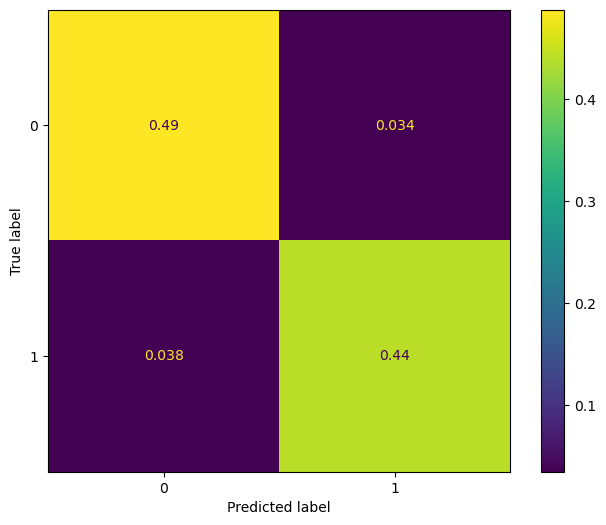

In [25]:

ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test,normalize='all')

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [27]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
# balanced oldugu icin direkt accuracye bakabiliriz. train ve test 93-94, yani genelleme yapmis model
# ama emin olmak icin cross val.

Test_Set
[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 973   57]
 [  62 1008]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.95      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Elbow Method for Choosing Reasonable K Values

In [28]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [29]:
# ONEMLİ: Optimum K değerini seçmek için öncelikle datamız dengeli ise accuracy metricini, dengesiz ise hedef 
# classımızın recall metriğini kullanabiliriz.

test_error_rates = []

for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)


# score olarak accuracy yazdik balanced oldugu icin, eger imbalanced olsaydi recall veya f1 secerdik scoring

# Her komşu sayısı(1-30 arasında) için önce accuracy scorunu bulup daha sonra bu scoru 1'den çıkararak her K değeri için
# error scorumuzu buluyoruz.

# ÇOK ÖNEMLİ NOT: test datasında (hold out set) üzerinden bulacağımız en optimum K değeri data leakage sorununa neden 
# olabileceğinden train datamızı CV'da verip burdaki validation setinin ortalama error scorlarına göre karar vereceğiz.
# test datasini ise karistirmiyoruz.

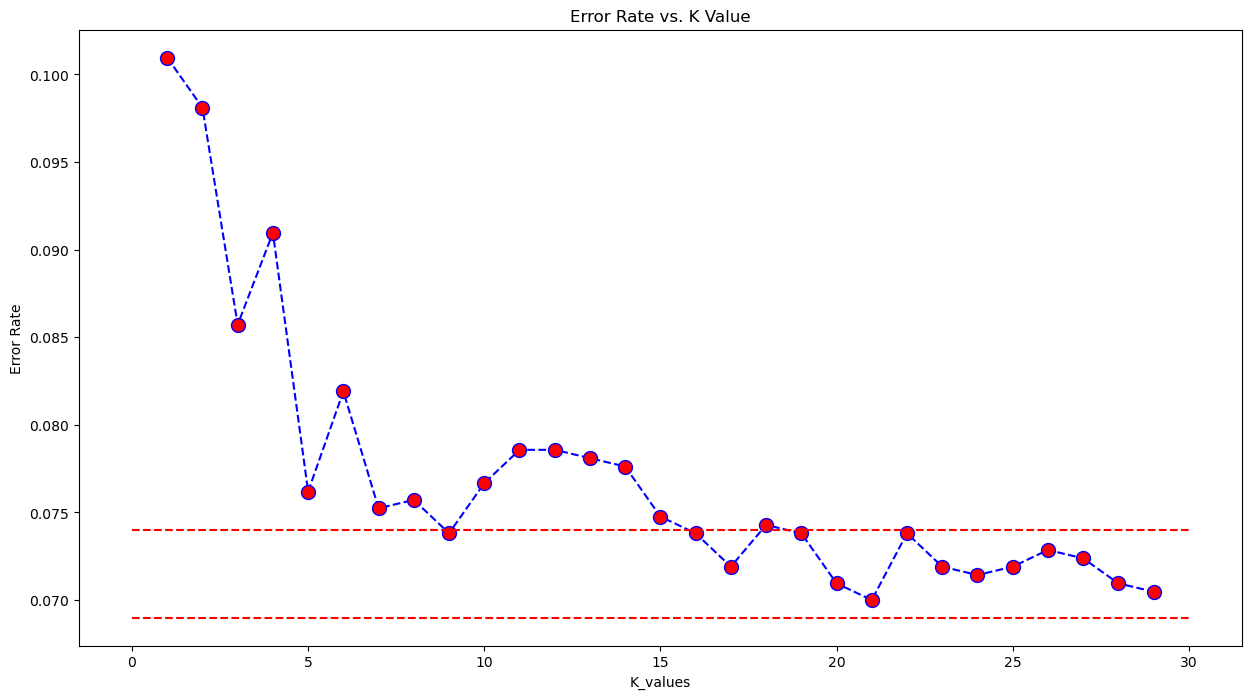

In [30]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Bulduğumuz error scorlarını görselleştiriyoruz.
# gridsearch 21i secerdi, ama hesaplama maliyeti nedeniyle 9 daha mantikli. cunku 9da 0.074 error rate;
# 21 komsulukta ise 0.069 gibi; arada 0.005lik bir iyilesme var, bu kadar kucuk iyilesme icin computational cost'u 
# artirmak mantikli degil. Pc cok gucluyse veya data insan hayatina dairse yine de 21 secilmelidir.

## Overfiting and underfiting control for k values

In [31]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

# Yukarıda yaptığımız işlemin aynısını CV'da verdiğimiz train datası üzerinden elde ettiğimiz validation ve train datalarının
# ortalama error hatalarını karşılaştırıyoruz. Böylece overiftingi daha rahat görebileceğiz.

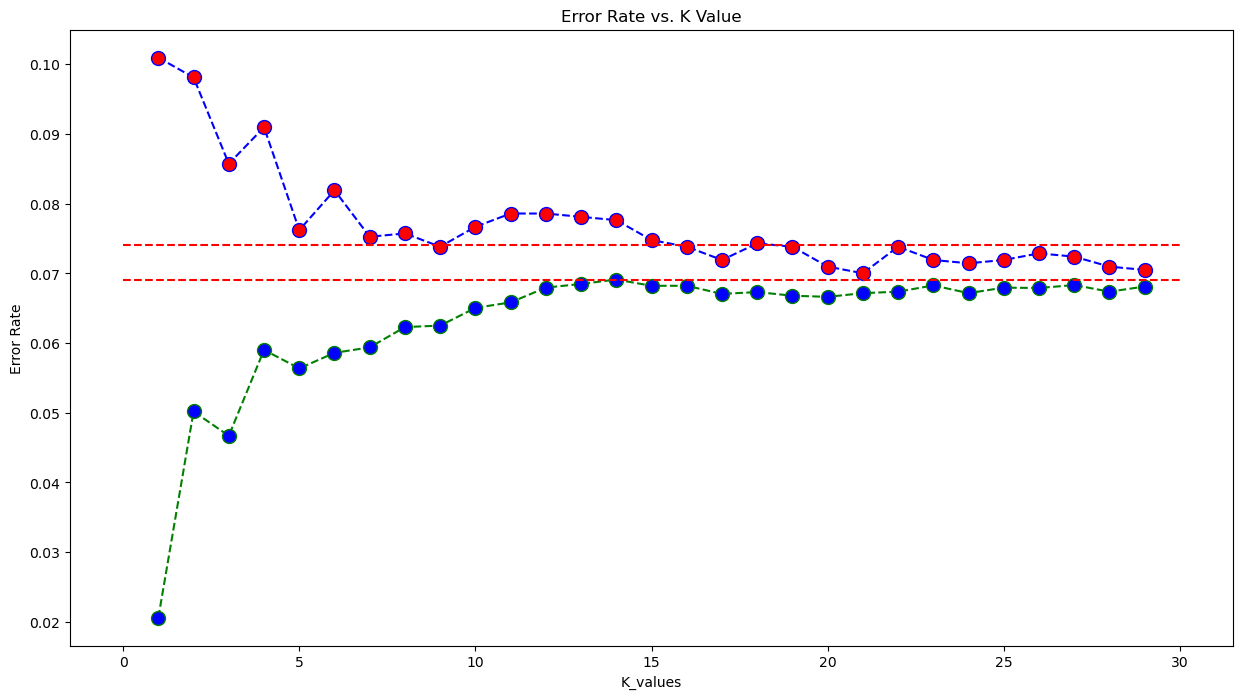

In [32]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Kırmızılar validation datası, maviler train datasına ait scorlar.
# val. datası için en düşük error scoru K=21'de alınmış ancak eğer 21'i seçersek modelin kompleksitisi yani çalışma maliyeti
# çok artacaktır. K= 9 için error 0.074 iken K=21 için error 0.069 dur. Aradaki 0.005'lik bir fark için bu kadar kompleksitiyi
# yani çalışma maliyetini göze almaya değer mi? Cevabını aradığımız soru budur. 
# 0.005'lik bir fark için bu kadar maaliyeti göze almaya değmez.

# K=21'de scorlar hem validation hem de train datasındaki error scorları nerdeyse aynı. Ancak K=9 'da ise validation datasının
# error scoru 0.074 iken train datasının error scoru 0.060'dır. Aradaki fark 0.014'dür. Yani fark çok az olduğundan K=9'u 
# gönül rahatlığı ile seçebiliriz.

## Scores by Various K Values

In [33]:
# kyi 1 secelim

operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]

knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

# Yukarıda aldığımız skorlar ile burdaki skorlar aynı çıkmasa bile yakın değerler çıkmasını bekliyoruz
.

WITH K=1

Test_Set
[[424  46]
 [ 49 381]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900


Train_Set
[[1008   22]
 [  26 1044]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1030
           1       0.98      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [34]:
# kyı 21 secelim

operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=21))]
knn21 = Pipeline(steps=operations)

knn21.fit(X_train, y_train)
print('WITH K=21\n')
eval_metric(knn21, X_train, y_train, X_test, y_test)

WITH K=21

Test_Set
[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  67 1003]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [35]:
# k 9
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)

knn9.fit(X_train, y_train)
print('WITH K=9\n')
eval_metric(knn9, X_train, y_train, X_test, y_test)

# 21de hata sayısı 49 acc score ise 95ti. 9 komslukta ise 94 score, 52 hata. bu bir tercih meselesi
# kanser datasi oldugu icin 21 komsluk secilebilir, ama sales, price vs olsaydi 9u secebilirdik


WITH K=9

Test_Set
[[445  25]
 [ 27 403]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[ 961   69]
 [  59 1011]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Cross Validate For Optimal K Value

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate

In [37]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# overfitting yok; 92-93

test_accuracy      0.926190
train_accuracy     0.937513
test_precision     0.925520
train_precision    0.936111
test_recall        0.930841
train_recall       0.941641
test_f1            0.927892
train_f1           0.938862
dtype: float64

In [ ]:
# elbow metoduyla 9 kyi bulduk. gridsearch ile deneyelim practice icin bir de:


## Gridsearch Method for Choosing Reasonable K Values

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)
k_values= range(1,30)
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

# KNN için en önemli olan hyper_parametrelerimiz:
# 1. n_neighbors (binary modellerde classlar arasında eşitlik olmaması için tek sayı olmasına dikkat edilmelidir. Multiclass
#                 datalarda tek veya çift olması farketmez.)
# 2. weights
# 3. p'dir.

In [40]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True,)


In [41]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True)

In [42]:
knn_grid_model.best_estimator_
# GridsearchCV herzaman en düşük error scorunu verecek olan maximum metric 
# scorunu döndürür. GridsearchCV sonrası bulacağımız n_neighbors sayısı 
# çok maliyetli olabileceğinden elbow metoduyla seçmek best practicedir.
# default olan 5 olsaydi sonuc asagida normal bos birakirdi


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [43]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]


mean_test_score         0.93
mean_train_score    0.932857
Name: 82, dtype: object

In [44]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)


WITH K=21

Test_Set
[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  67 1003]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [45]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

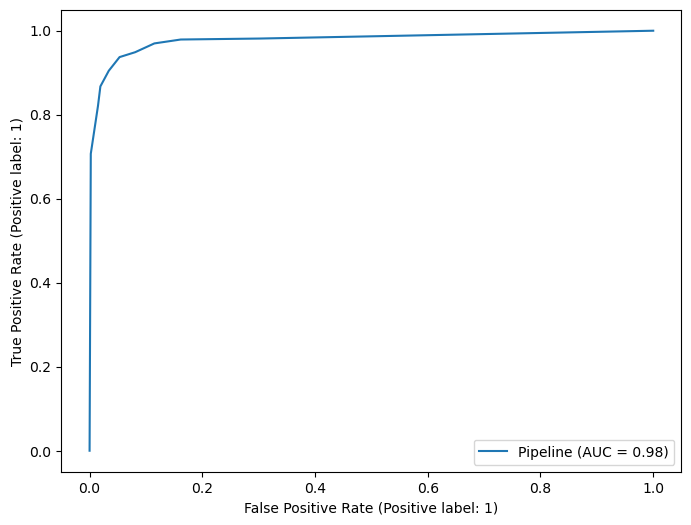

In [46]:

RocCurveDisplay.from_estimator(knn9, X_test, y_test)

# tüm thresholdlarda 0 ve 1 classları ne kadar ayristirilabiliyor. %98 oranında genel performans
.

In [47]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])  # burda y_pred hata verir, olasilik vermemiz lazim

0.9783102424542306

## Final Model and Model Deployment

In [48]:
# 9 k ile final model building

operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [49]:
import pickle

In [50]:
pickle.dump(final_model, open('knn_final_model', 'wb'))
# daha az yer kaplamasi icin binary yaz


## Predict New Observations

In [51]:
# ihtiyac halinde modeli cagirabiliriz read ile (rb)
loaded_model = pickle.load(open('knn_final_model', 'rb'))


In [52]:
X.describe()
# ortalama degerler secmek icin describeı kontrol edelim ve min-max arası 8 deger alalim


,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [53]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [54]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [55]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)


In [56]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

# 0a 100% 0 class, kanser degil demis. 1e ise 88% ile 0 class demis. Yani 9 komsuluk demistik,
# bu 9un 8i 0 classtan; sadece 1 i 1 classtanmis. Ondan 0 class demis. 5 icinse, yani 9.5 gene 1 ve 10 gene 2su olan
# bir gozlem icin 66% olasılıkla 1 class demis. yani 6 komsu 1 class, 3 komsu 0 class imis
.

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000
